# Exploratory Data Analysis

This is an exercise for myself to get familiar with the Jupyter environment, pandas, matplotlib and scipy libraries.    
The idea is to make a data analysis from a store dataset and determine which product category have the most profit.  
In the process I apply stadistic tests and perform data visualization to verify the inicial answer provided by the data.   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox 
import seaborn as sns 
from scipy import stats

import chardet
with open(r".\assets\Sample - Superstore.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [4]:
df = pd.read_csv(r"C:\Users\Florencia\Desktop\Practicas\Sample - Superstore.csv", encoding = 'Windows-1252' )

### View of dataset

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Objective : Know wich product category gives the most profit from a statistical analysis

I will work with the variables "Category" and "Profit" of the dataset.
The first step is to show a summary of each one to see their characteristics.

In [6]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

The variable "Category" has 3 product categories : Furniture, Office Supplies y Technology

In [7]:
df["Profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

The variable "Profit" has negative values (this is interesting in case you have to transform the variable and choose between the Box-Cox and Yeo & Johnson methods)

Here I'm grouping and summing profit by category to have a first view

In [8]:
df.groupby(["Category"])["Profit"].sum().sort_values(ascending= False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

We can see that Technology category has the most profit.
Now, let's see if the statistical tests verify this statement

The ideal is to do an F test to compare the profit means of categories.  
But for doing the test we have to confirm the assumptions that support it are met

**Note** : alpha or level of significance will be 5%

## Assumptions : Independence, normality and homocedasticity

### Independence
The dataset comes from an aleatory sample and the variables in it don't depend on each other

### Normality
This assumption can be verified with the Shapiro Wilk test, but we can also do it with a BoxPlot

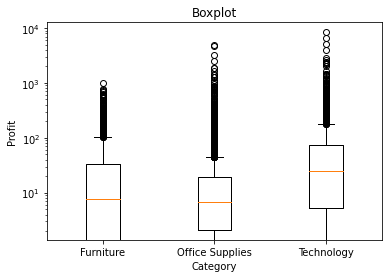

In [9]:
# I group the profit by category

furniture = df.loc[df.Category == "Furniture"]["Profit"]
office_supplies = df.loc[df.Category == "Office Supplies"]["Profit"]
technology = df.loc[df.Category == "Technology"]["Profit"]

plt.title("Boxplot")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.yticks([-4000, -2000, 0, 2000, 4000, 6000, 8000])

labels = ["Furniture", "Office Supplies", "Technology"]

plt.boxplot([furniture, office_supplies, technology], labels = labels)
plt.semilogy()
plt.show()

We know that there is no normality because there are many outliers

## Road to the transformation
We can apply a transformation to the data to try to get normality.  
But first let's see how each of the variables "Category" and "Profit" are distributed, and see if we consider a transformation

Let's start with the variable "Profit"

C:\Users\Florencia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


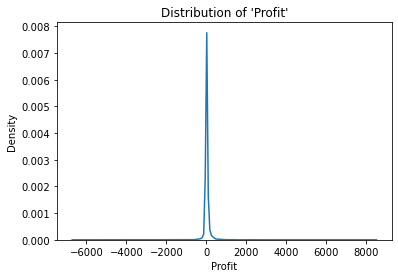

In [10]:
# Distribution plot

profit = df["Profit"]

plt.title("Distribution of 'Profit'")

sns.distplot(profit, hist=False, kde=True)

plt.show()

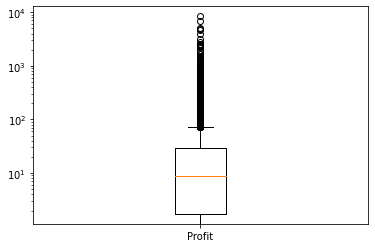

In [11]:
# Boxplot

labels = ["Profit"]

plt.boxplot(profit, labels = labels)

plt.semilogy()

plt.show()

The distribution of "Profit" is not a normal distribution

"Category" variable

C:\Users\Florencia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


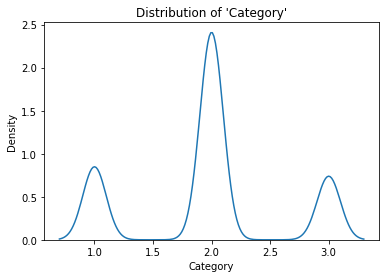

In [12]:
# Distribution plot

# Convert the "Category" variable to integer
 
df["Category"] = df["Category"].map({"Furniture" : 1, "Office Supplies" : 2, "Technology" : 3})

category = df["Category"]

plt.title("Distribution of 'Category'")

sns.distplot(category, hist=False, kde=True)

plt.show()

The distribution of "Category" is normal

## Applying Yeo and Johnson transformation on "Profit"

We can transform the variable "Profit" using the Yeo and Johnson method because this variable has negative values and we can't use Box-Cox.  

Through the transformation of the data we hope to obtain normality, but it could not happen.

C:\Users\Florencia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


 Value of lambda used for transformation : 0.9881014981240227


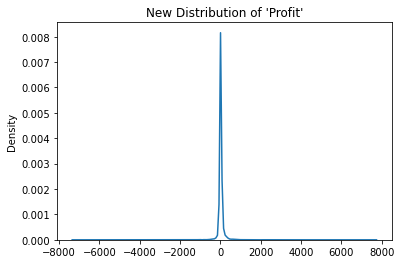

In [13]:
profit = df["Profit"]

profit_transform, best_lambda = stats.yeojohnson(profit)

plt.title("New Distribution of 'Profit'")

sns.distplot(profit_transform, hist=False, kde=True) 

print(f" Value of lambda used for transformation : {best_lambda}")

plt.show()

We can see that there is no difference in the transformed "Profit".
So, we couldn't get normality 

### Homocedasticity

We are going to use the Levene Test for the comparison of variances because we don't have normality

**Null Hypotesis** = the variances of each category grouped by profit are equal

**Alternative Hypotesis** = the variances of each category grouped by profit aren't equal

In [14]:
df = pd.read_csv(r"C:\Users\Florencia\Desktop\Practicas\Sample - Superstore.csv", encoding = 'Windows-1252' )

profit_furniture = df.loc[df.Category == "Furniture"]["Profit"]
profit_office = df.loc[df.Category == "Office Supplies"]["Profit"]
profit_tecno = df.loc[df.Category == "Technology"]["Profit"]

levene_test = stats.levene(profit_furniture, profit_office, profit_tecno, center = "median")
levene_test

LeveneResult(statistic=82.53479590030642, pvalue=2.8085330840251473e-36)

With a significance level of 5% and a p-value of approximately 0%, I reject the null hypotesis. The variances aren't equal

## Non parametric test : Kruskal Wallis

We can't do the F test because normality and homocedasticity are not fulfilled, and we have to resort as a last option to the non parametrical test Kruskal Wallis, with the consequence that this is less powerful.

**Null Hypotesis** = All the categoryes grouped by profit have the same mean

In [15]:
# Convert Category descriptions to IDs
df["Category"] = df["Category"].map({"Furniture" : 1, "Office Supplies" : 2, "Technology" : 3})

category = df["Category"]
profit = df["Profit"]

stats.kruskal(category, profit)

KruskalResult(statistic=3565.1756231198733, pvalue=0.0)

With a p-value of 0% I reject the null hypotesis, this means that profit means by category are not the same.  
This verifies our first assumption, that Technology category had the most profit.

## Conclusion

We have corroborated through a summary of data and a statistical analysis on the variables of interest that the category of Technology products have the most profit.  
We could answer others questions, like:

- 'What is the Region with the most Sales?'
- 'What is the Region that buys more products of Technology?'

But I consider this enough for this exercise.  
Any comments or suggestions are welcome.